+ Top 50 matplotlib  
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

+ Top 21 Samsung Competitors – Competitor analysis of Samsung  
https://www.marketing91.com/samsung-competitors/  


# INDEX<a name="INDEX"></a>
---
+ [초기설정(필수)](#초기설정)
+ [심볼리스트 생성](#init)
+ [데이터 다운로드](#down)
+ [OLS](#ols)
+ [Joint Plot](#joint)
+ [데이터확인](#확인)
+ [co-kurtosis - WIP](#cokur)

# Note
---
+ read_csv 에서 오류가 난다면 Analyze.py에

```python
engine = 'python'
```
를 추가해 줘보자.

```python
pd.read_csv('data/'+target_1 + '.csv',index_col='Date',engine='python')
```

+ csv 파일이 제대로 되어있는지 확인하여보자  
        메모장으로 열었을 시에 제대로 ',' 로 구분되어야한다.  
        엑셀 파일을 받아서 csv로 변환이 잘 안되는 경우가 있다.

+ 출력이 스크롤 안에 안 들어가게 하기  
        Cell -> All output (또는 Current outputs) -> toggle scrolling  
        또는 cell 선택후 'o'

### [초기 설정](#INDEX)<a name="초기설정"></a>
+ 한글 출력을 위한 폰트 설정, 각 PC마다 환경이 다름 ([matlplot 한글폰트](matlplot%20한글폰트.ipynb).ipynb 참고)
+ 사용할 지표들 등록

In [2]:
import SymbolList as sl
import Analysis as an
import Visualization as vi
import numpy as np
import pandas as pd
import datetime as dt 
from statsmodels.formula.api import ols 
import seaborn as sns;  sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl

# matplot 설정
mpl.rcParams['axes.unicode_minus'] = False
# -*- coding: utf-8 -*-
plt.rc('font', family="LG PC")
# 리스트 설정
ten_kor = ['Samsung_Electronics','SK_hynix','LG_Electronics',
    '삼성SDI','엔씨소프트','카카오','삼성전기',
    'LG디스플레이','삼성SDS','네이버']
ten_US = [  'Apple','Microsoft','IBM','Oracle',
            'Amazon','Tesla','Alphabet','Facebook',
            'Cisco','타이완 반도체','Intel','오라클','SAP']
index_kor = '와이즈'
#index_US = 'IXT'
index_US = 'XLK'
#stan_US = ['IXT','VIX','BitCoin','MSCI','ten_Year_Treasury']
#stan_US = ['XLK','VIX','BitCoin','MSCI','ten_Year_Treasury']
stan_US = ['XLK','KOSPI','MSCI','ten_Year_Treasury','Apple','SK_hynix']

### 지표 설명
+ [와이즈](http://www.wiseindex.com/Index/Index#/WI610.0) - 와이즈 IT하드웨어 지수
+ [IXT](https://finance.yahoo.com/quote/%5EIXT?p=^IXT&.tsrc=fin-srch) : TECHNOLOGY SELECT SECTOR INDEX  - 현재 미사용, 온전한 3년치를 얻을 방법을 못 찾음
+ [XLK](https://finance.yahoo.com/quote/XLK?p=XLK&.tsrc=fin-srch): Technology Select Sector SPDR Fund 
+ [VIX](https://finance.yahoo.com/quote/ZM?p=ZM&.tsrc=fin-srch) : VelocityShares Daily 2x VIX Short-Term ETN(a.k.a 공포지수), S&P500지수 옵션 가격의 향후 30일 동안의 변동성에 대한 시장의 기대
+ [MSCI](https://finance.yahoo.com/quote/EEM?p=EEM&.tsrc=fin-srch) : iShares MSCI Emerging Markets ETF
+ [ten_Year_Treasury](https://finance.yahoo.com/quote/IEF?p=IEF&.tsrc=fin-srch) : iShares 7-10 Year Treasury Bond ETF

# [OLS ](#INDEX)<a name="ols"></a>
```python
def ols_comb(             
           dep,inds,
           comb_num=1,
           show_summary = False,
           do_shift = True,
           show_plot = True,  
           show_line = False,
           weekly=True,
           start='2016-01-04',
           end='2018-12-28',
           engine='c'
            )
    ```

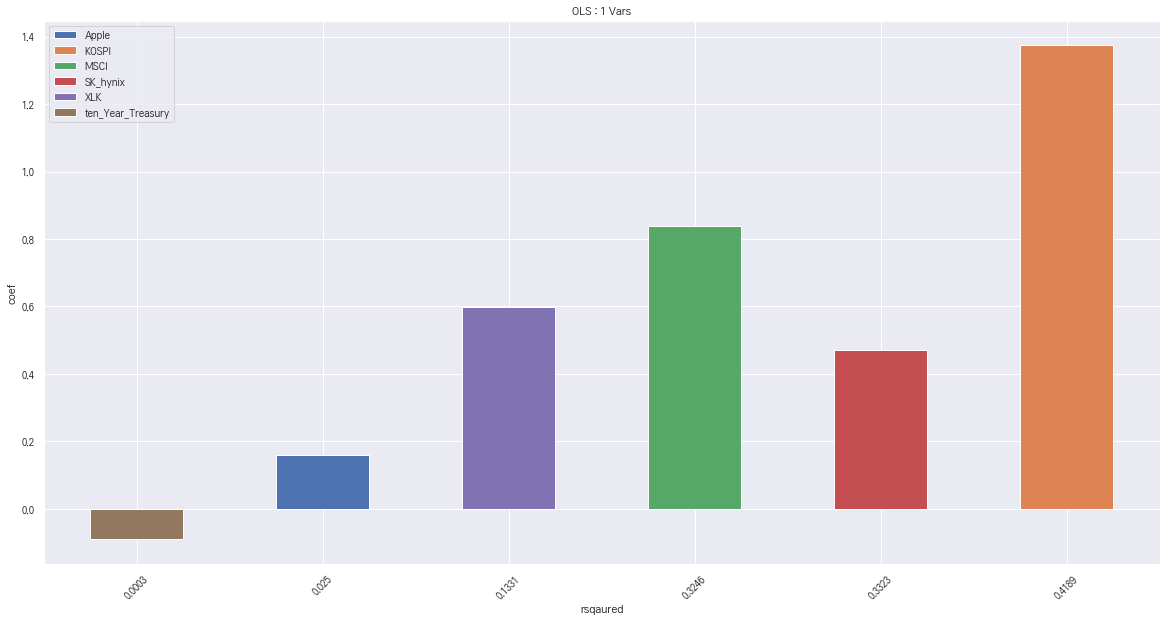

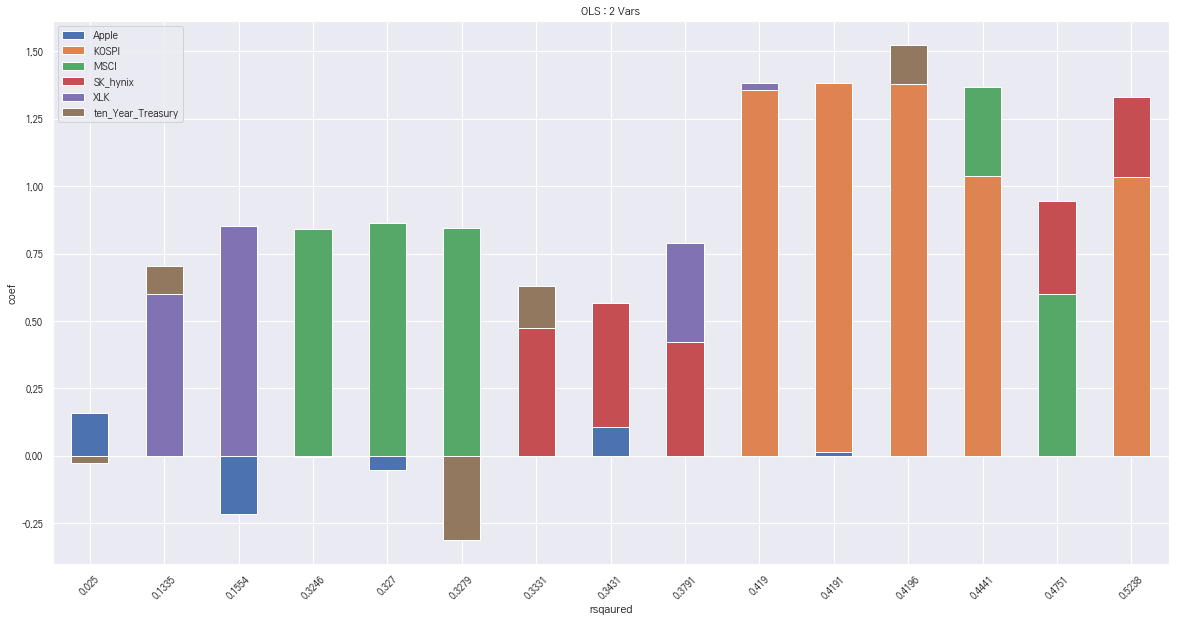

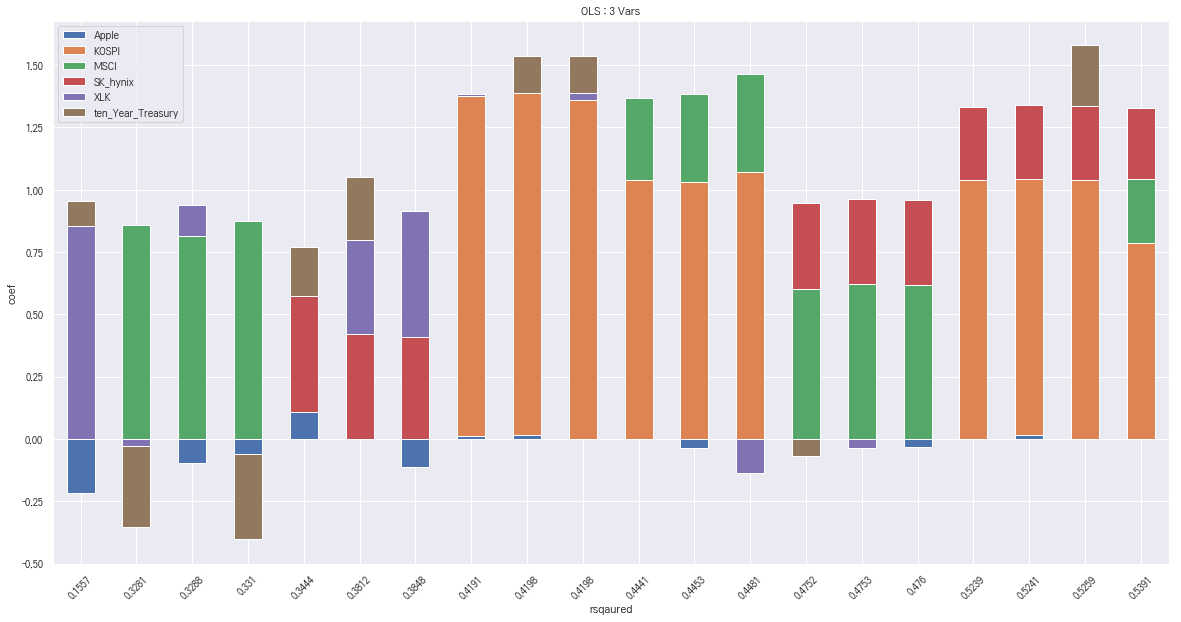

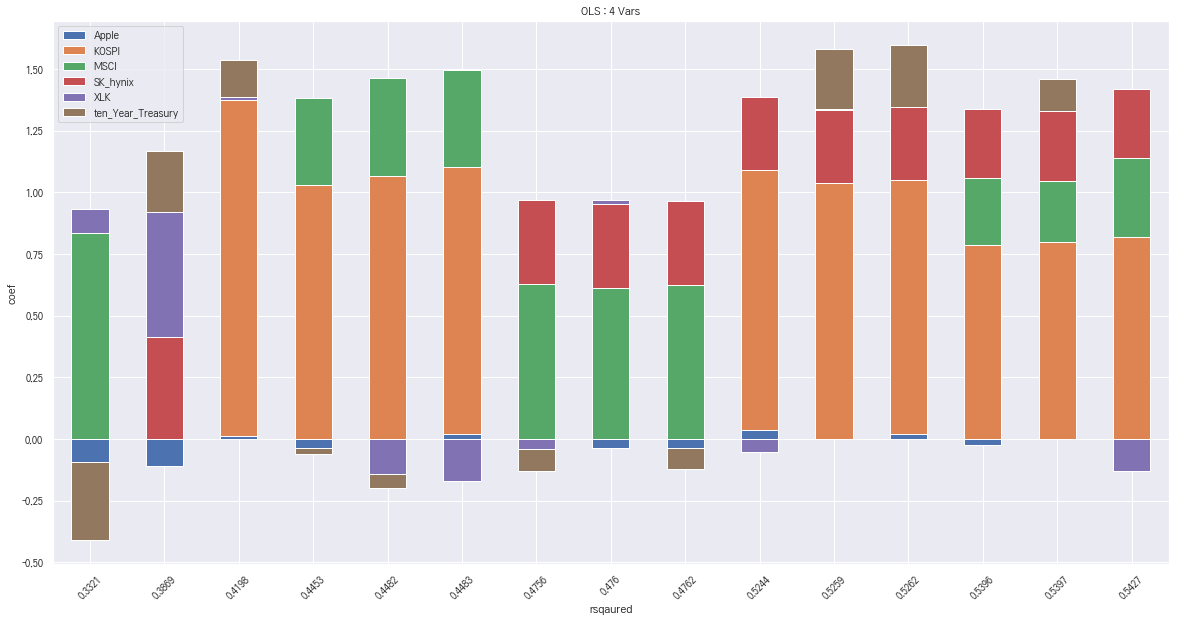

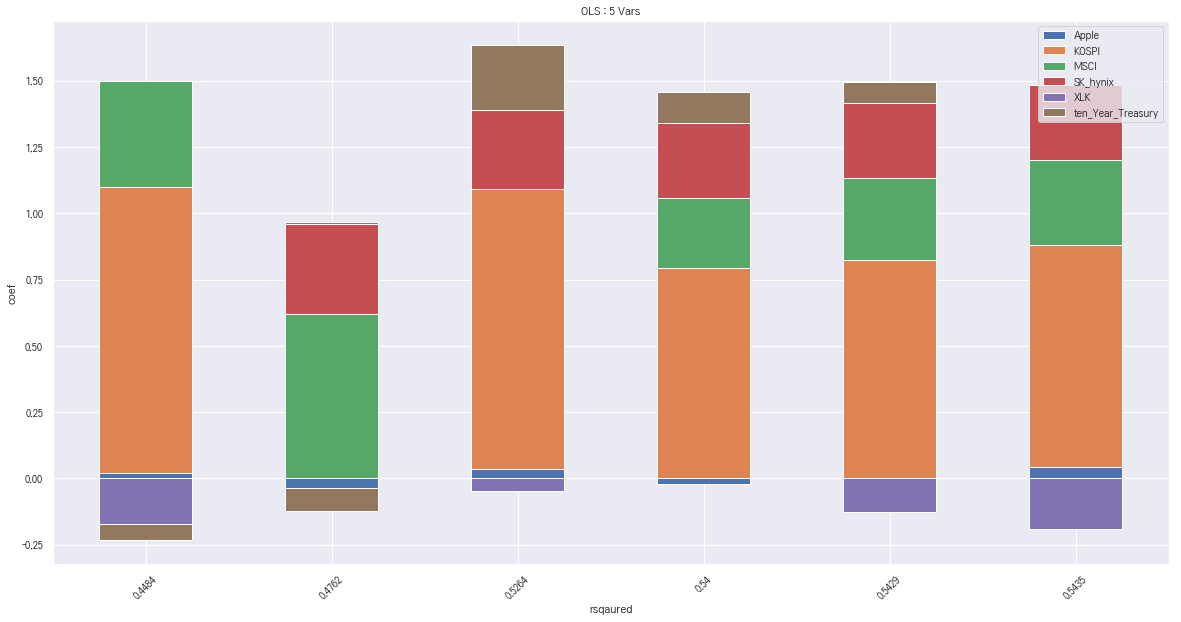

In [3]:
an.ols_comb(comb_num=1,dep='Samsung_Electronics',inds=stan_US,show_summary=False,show_plot=True)
an.ols_comb(comb_num=2,dep='Samsung_Electronics',inds=stan_US,show_summary=False,show_plot=True)
an.ols_comb(comb_num=3,dep='Samsung_Electronics',inds=stan_US,show_summary=False,show_plot=True)
an.ols_comb(comb_num=4,dep='Samsung_Electronics',inds=stan_US,show_summary=False,show_plot=True)
an.ols_comb(comb_num=5,dep='Samsung_Electronics',inds=stan_US,show_summary=False,show_plot=True)

# [데이터 확인](#INDEX)<a name="확인"></a>

2016년부터 2018년 까지의 데이터 plotting.

In [ ]:
an.isValid(stan_US)

In [ ]:
an.isValid(ten_kor)
#an.isValid(ten_US)

# [Symbol List 초기화 & 불러오기](#INDEX)<a name="init"></a>
+ IXT 같은 index 는 잘 안불러진다.
+ 잘 받았는지 검증하는 루틴이 필요함. 

In [ ]:
df = sl.init_symbol_DF()
sl.add_symbol(df,'삼성SDS','018260.KS',init=True)
df = sl.init_symbol_DF()

# [Symbol List 에서 데이터 받기](#INDEX)<a name="down"></a>

TODO::이전에 받은 날짜에 이어서 붙이는거 추가하자.

In [ ]:
sl.download()

# [co-kurtosis WIP](#INDEX)<a name="cokur"></a>
+ how to calculate coskew and cokurtosis
https://stackoverflow.com/questions/41890870/how-to-calculate-coskew-and-cokurtosis

생각을 좀 해봐야겠다.

$$ K(X,X,Y,Y)= {E[(X - E[X])^2(Y - E[Y]^2)] \over \sigma_X^2\sigma_Y^2}$$

변화율로 가야하나, 정규화를 해야하나, 그냥 해도 되나

```python
def cokur(
    target1,
    target2,
    start='2016-01-04',
    end='2018-12-28',
    engine='c',
    value = 'Close'
    ):  
    ```

,Samsung_Electronics
XLK,1.181410
KOSPI,2.822689
MSCI,1.299051
ten_Year_Treasury,1.139796
Apple,1.368052
SK_hynix,1.852211


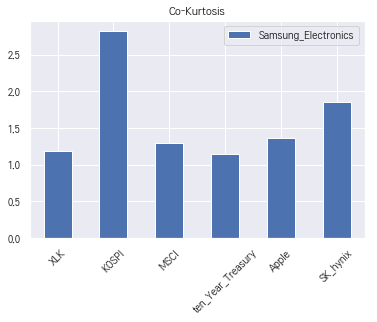

In [28]:
df_cokur = pd.DataFrame(columns=['Samsung_Electronics'])
for stans in stan_US:
    tmp = an.cokur('Samsung_Electronics',stans)
    df_cokur.loc[stans] = [tmp['Close']]
display(df_cokur)
df_cokur.plot(kind='bar',rot=45,title='Co-Kurtosis')


# [Joint plot](#INDEX)<a name="joint"></a>
https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
for idx in range(0,len(ten_kor)):
    an.joint(ten_kor[idx],index_US)

In [ ]:
for idx in range(0,len(ten_US)):
    an.joint(ten_US[idx],index_kor)